<a href="https://colab.research.google.com/github/ArsT1982/DSML-59-DZ-5/blob/main/DSML_59_DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ-5. Домашнее задание: EDA и улучшение качества модели (California Housing)

Цель: провести разведочный анализ, отобрать признаки, убрать выбросы и трансформировать данные, чтобы снизить RMSE и повысить R² для модели линейной регрессии.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = fetch_california_housing(as_frame=True)
df = data.frame
print(df.head())
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [20]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [22]:

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_pred_test))
r2_train   = r2_score(y_train, y_pred_train)
r2_test    = r2_score(y_test,  y_pred_test)

print(f"Все переменные RMSE (train)={rmse_train:.3f}, (test)={rmse_test:.3f}")
print(f"Все переменные R2   (train)={r2_train:.3f}, (test)={r2_test:.3f}")


Все переменные RMSE (train)=0.720, (test)=0.746
Все переменные R2   (train)=0.613, (test)=0.576


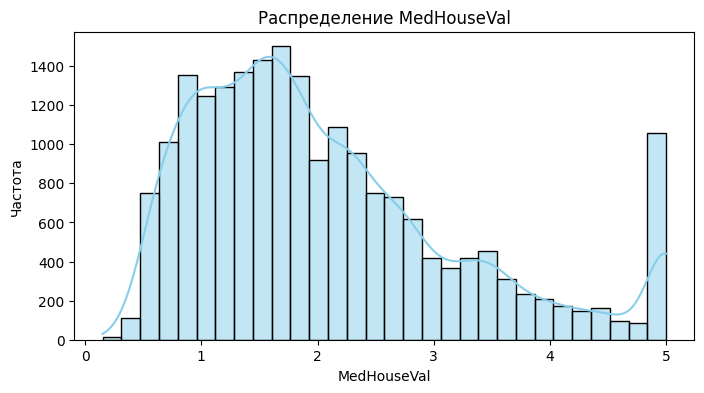

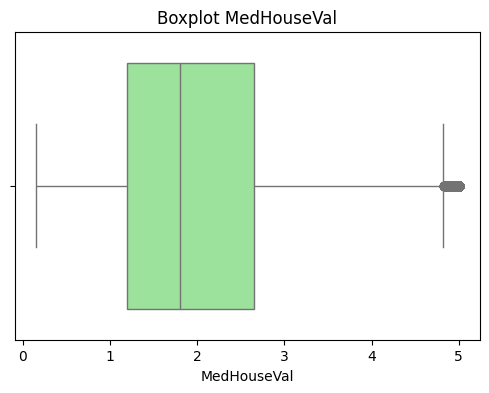

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Распределение MedHouseVal')
plt.xlabel('MedHouseVal'); plt.ylabel('Частота')
plt.show()

# boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=y, color='lightgreen')
plt.title('Boxplot MedHouseVal')
plt.show()

Наблюдаются редкие высокие значения — выбросы.

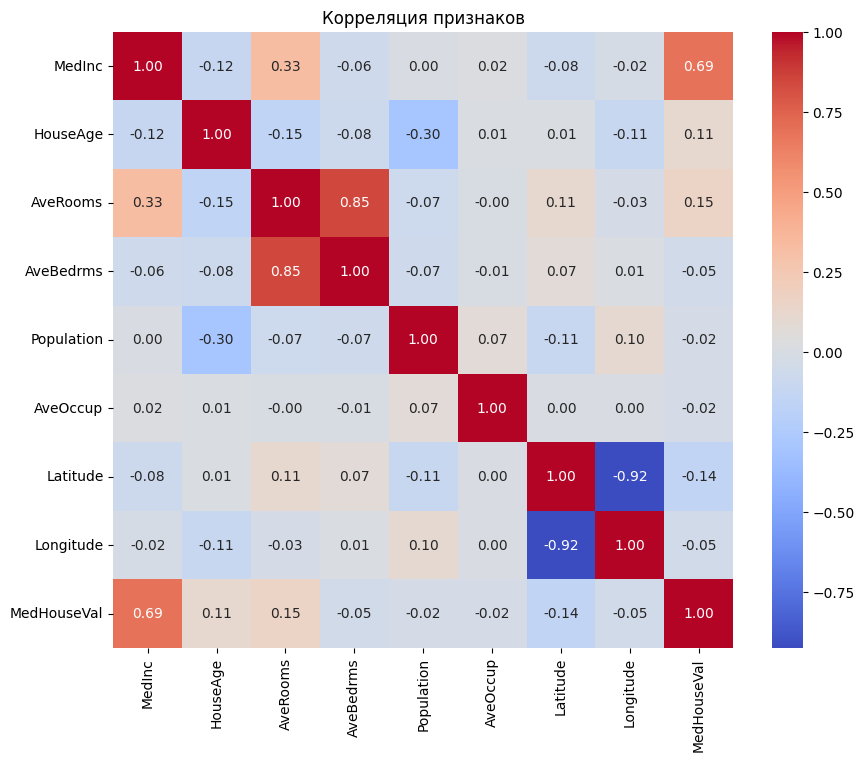

Отобранные признаки: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


In [25]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

# Выбераю признаки с |corr| ≥ 0.04 с MedHouseVal
strong = corr['MedHouseVal'].abs() >= 0.04
selected = strong[strong].index.drop('MedHouseVal').tolist()
print("Отобранные признаки:", selected)


Вывод: признаки 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude' - наиболее сильно коррелируют.



Модель на отобранных признаках

In [26]:
X_sel = df[selected]


X1_tr, X1_te, y1_tr, y1_te = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)


model1 = LinearRegression().fit(X1_tr, y1_tr)
y1p_tr = model1.predict(X1_tr)
y1p_te = model1.predict(X1_te)

rmse1_tr = np.sqrt(mean_squared_error(y1_tr, y1p_tr))
rmse1_te = np.sqrt(mean_squared_error(y1_te, y1p_te))
r2_1tr   = r2_score(y1_tr, y1p_tr)
r2_1te   = r2_score(y1_te, y1p_te)

print(f"Отобранные признаки  → RMSE train={rmse1_tr:.3f}, test={rmse1_te:.3f}")
print(f"Отобранные признаки  → R2   train={r2_1tr:.3f}, test={r2_1te:.3f}")


Отобранные признаки  → RMSE train=0.721, test=0.746
Отобранные признаки  → R2   train=0.611, test=0.575


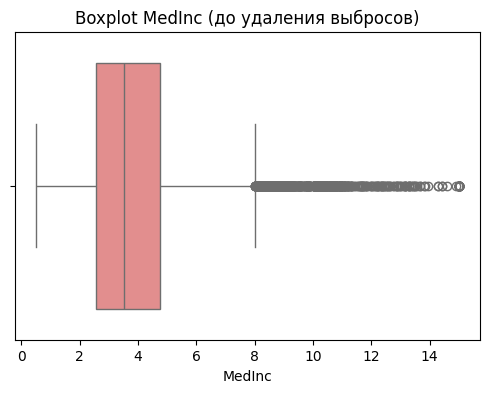

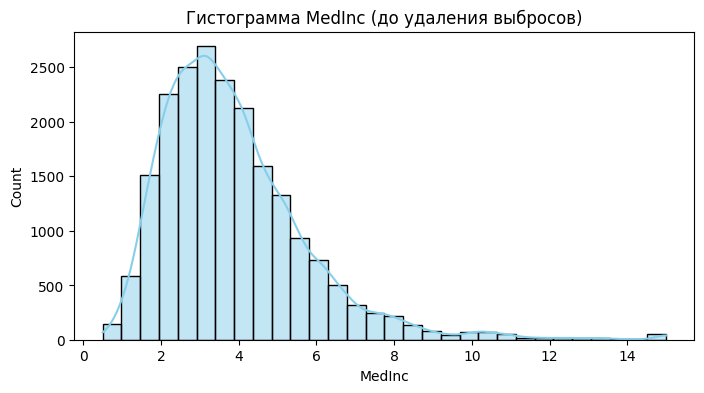

In [27]:
## 8. Исследуем оставленные признаки на выбросы


# Первым проверяю selected = ['MedInc']
selected_prisnak_1 = ['MedInc']

# 8.1. Boxplot и гистограмма для каждого отобранного признака
for col in selected_prisnak_1:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

После удаления выбросов осталось 19959 записей (из 20640)


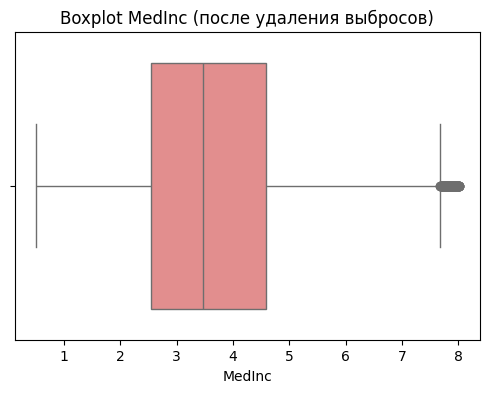

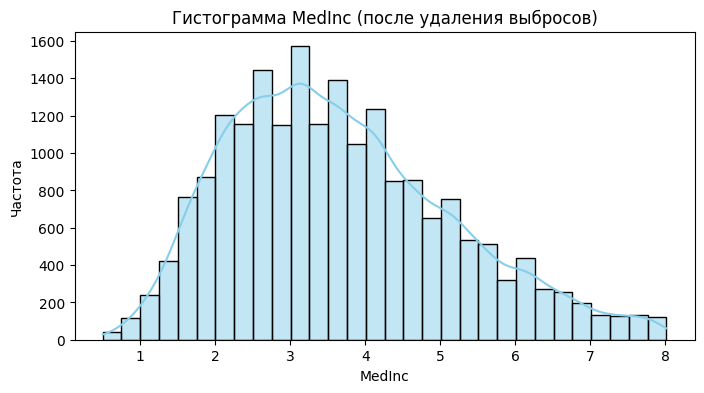

NO OUTLIERS → RMSE test=0.724, R2 test=0.549


In [28]:
# Вычисляю границы IQR для признака и формирую маску
df_no = df.copy()
for col in selected_prisnak_1:
    Q1 = df_no[col].quantile(0.25)
    Q3 = df_no[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no = df_no[(df_no[col] >= low) & (df_no[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no)} записей (из {len(df)})")

for col in selected_prisnak_1:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no[selected]
y_no   = df_no['MedHouseVal']
X2_tr, X2_te, y2_tr, y2_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model2 = LinearRegression().fit(X2_tr, y2_tr)
y2p_te = model2.predict(X2_te)

rmse2_te = np.sqrt(mean_squared_error(y2_te, y2p_te))
r2_2te   = r2_score(y2_te, y2p_te)
print(f"NO OUTLIERS → RMSE test={rmse2_te:.3f}, R2 test={r2_2te:.3f}")


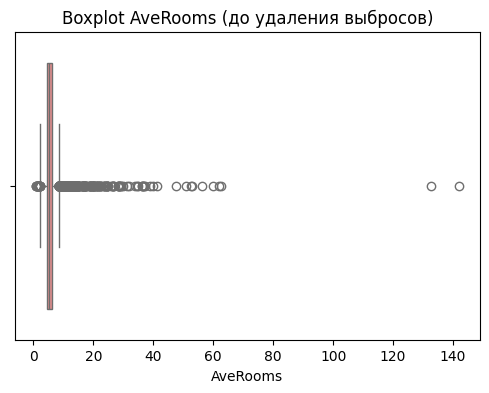

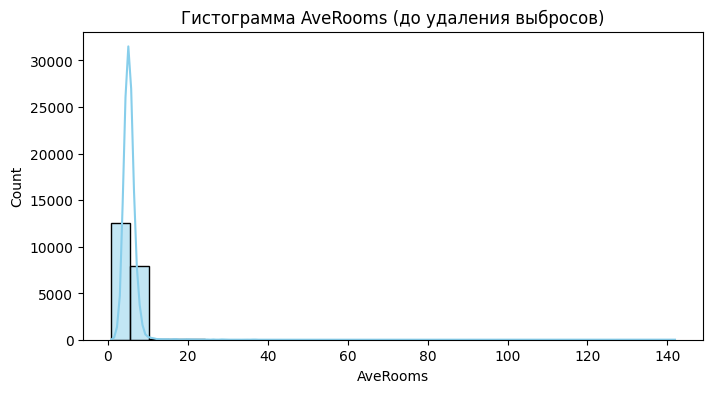

In [29]:
## 8. Исследуем оставленные признаки на выбросы


# Вторым проверяю selected = ['AveRooms']
selected_prisnak_2 = ['AveRooms']

# 8.1. Boxplot и гистограмма для каждого отобранного признака
for col in selected_prisnak_2:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

После удаления выбросов осталось 19520 записей (из 19959)


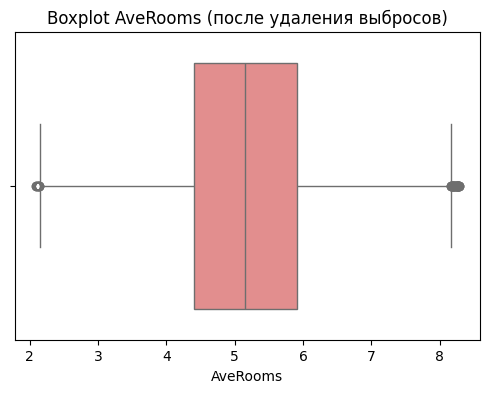

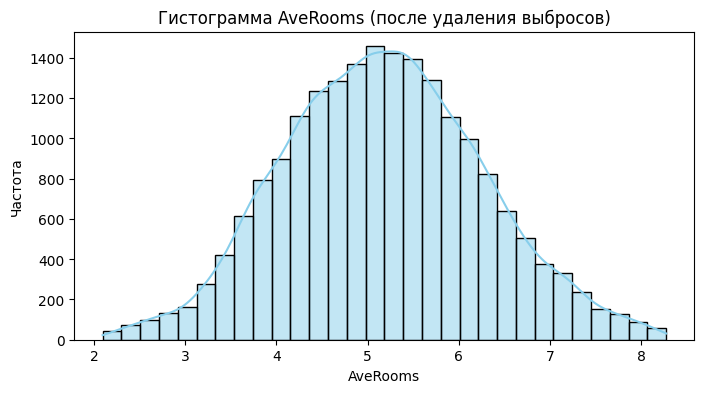

NO OUTLIERS → RMSE test=0.695, R2 test=0.574


In [30]:
# Вычисляю границы IQR для признака и формирую маску
df_no2 = df_no.copy()
for col in selected_prisnak_2:
    Q1 = df_no2[col].quantile(0.25)
    Q3 = df_no2[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no2 = df_no2[(df_no2[col] >= low) & (df_no2[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no2)} записей (из {len(df_no)})")

for col in selected_prisnak_2:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no2[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no2[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no2[selected]
y_no   = df_no2['MedHouseVal']
X3_tr, X3_te, y3_tr, y3_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model3 = LinearRegression().fit(X3_tr, y3_tr)
y3p_te = model3.predict(X3_te)

rmse3_te = np.sqrt(mean_squared_error(y3_te, y3p_te))
r2_3te   = r2_score(y3_te, y3p_te)
print(f"NO OUTLIERS → RMSE test={rmse3_te:.3f}, R2 test={r2_3te:.3f}")


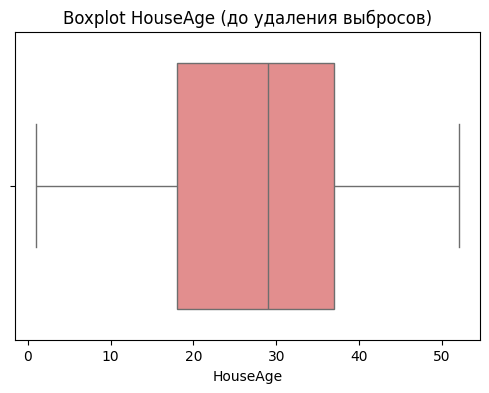

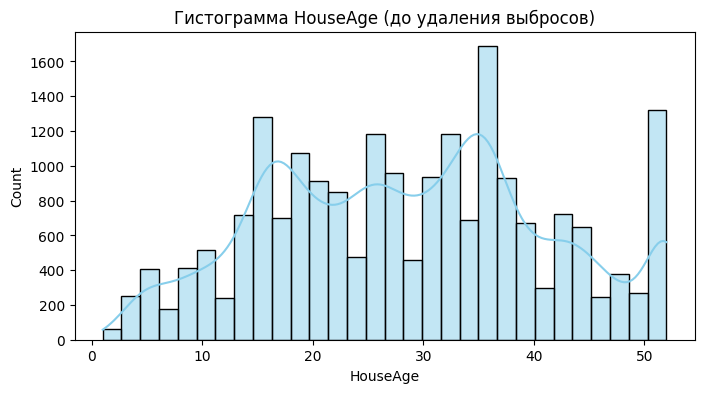

In [34]:
# Третим проверяю selected = ['HouseAge']
selected_prisnak_3 = ['HouseAge']

# 8.1. Boxplot и гистограмма для каждого отобранного признака
for col in selected_prisnak_3:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

После удаления выбросов осталось 19520 записей (из 19959)


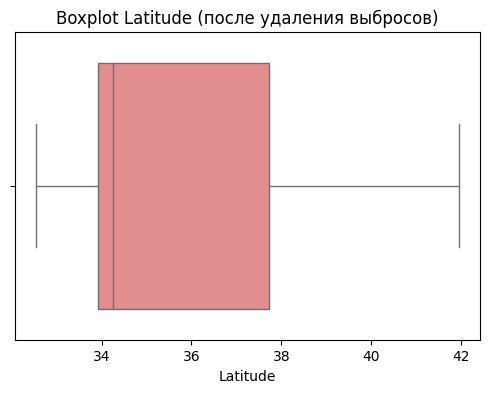

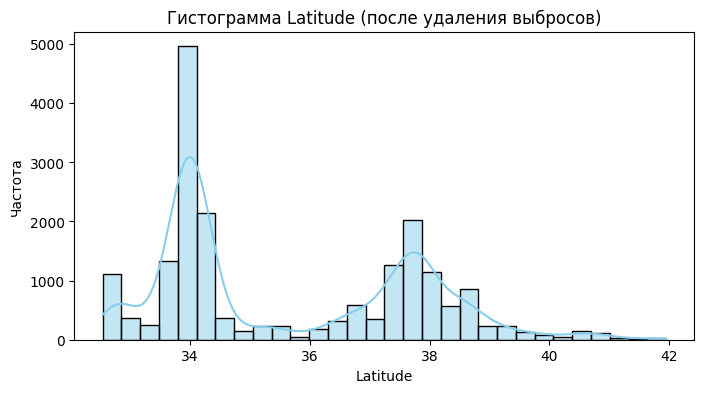

NO OUTLIERS → RMSE test=0.695, R2 test=0.574


In [40]:
# Вычисляю границы IQR для признака и формирую маску
df_no3 = df_no2.copy()
for col in selected_prisnak_3:
    Q1 = df_no3[col].quantile(0.25)
    Q3 = df_no3[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no3 = df_no3[(df_no3[col] >= low) & (df_no3[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no3)} записей (из {len(df_no)})")

for col in selected_prisnak_3:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no3[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no3[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no3[selected]
y_no   = df_no3['MedHouseVal']
X4_tr, X4_te, y4_tr, y4_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model4 = LinearRegression().fit(X4_tr, y4_tr)
y4p_te = model4.predict(X3_te)

rmse4_te = np.sqrt(mean_squared_error(y4_te, y4p_te))
r2_4te   = r2_score(y4_te, y4p_te)
print(f"NO OUTLIERS → RMSE test={rmse4_te:.3f}, R2 test={r2_4te:.3f}")


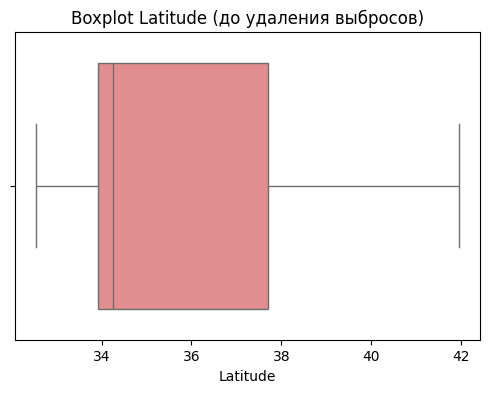

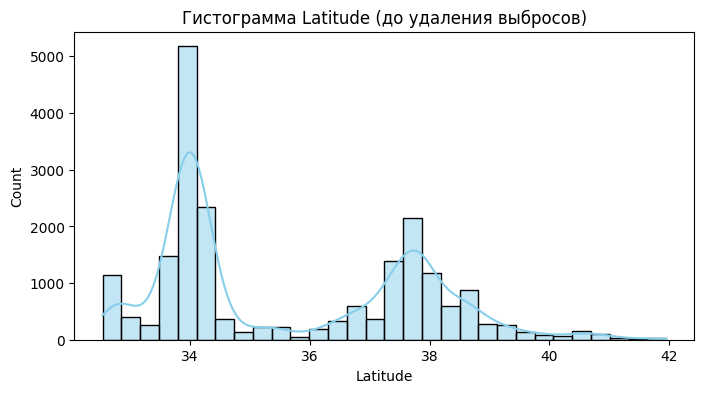

In [38]:
# 4м проверяю selected = ['Latitude']
selected_prisnak_4 = ['Latitude']

# 8.1. Boxplot и гистограмма для каждого отобранного признака
for col in selected_prisnak_4:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

После удаления выбросов осталось 19520 записей (из 19959)


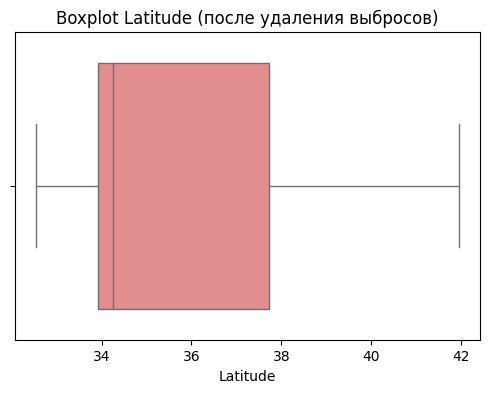

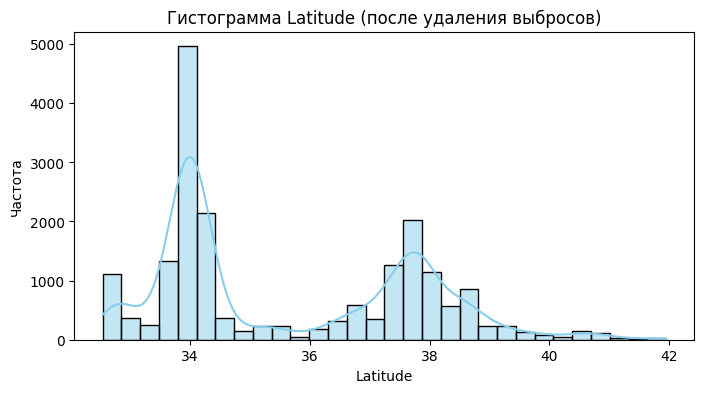

NO OUTLIERS → RMSE test=0.695, R2 test=0.574


In [43]:
# Вычисляю границы IQR для признака и формирую маску
df_no4 = df_no3.copy()
for col in selected_prisnak_4:
    Q1 = df_no4[col].quantile(0.25)
    Q3 = df_no4[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no4 = df_no4[(df_no4[col] >= low) & (df_no4[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no4)} записей (из {len(df_no)})")

for col in selected_prisnak_4:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no4[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no4[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no4[selected]
y_no   = df_no4['MedHouseVal']
X5_tr, X5_te, y5_tr, y5_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model5 = LinearRegression().fit(X5_tr, y5_tr)
y5p_te = model5.predict(X5_te)

rmse5_te = np.sqrt(mean_squared_error(y5_te, y5p_te))
r2_5te   = r2_score(y5_te, y5p_te)
print(f"NO OUTLIERS → RMSE test={rmse5_te:.3f}, R2 test={r2_5te:.3f}")


Удаление выбросов в отобранном признаке

In [104]:
# 7.1. Добавим log(Feature) и sqrt(Feature)
df_tr = df_no4.copy()

for col in selected_prisnak_3:
    df_tr[f"log_{col}"] = np.log1p(df_tr[col])
for col in selected_prisnak_2:
    df_tr[f"sqrt_{col}"] = np.sqrt(df_tr[col])




#X_tr = df_tr[[f"log_{c}" for c in selected]]  # пример: берем только лог
X_tr = df_tr.drop('MedHouseVal', axis=1)
print(X_tr.head())
y_tr = df_tr['MedHouseVal']

# 7.2. Разбиение) и обучение
X6_tr, X6_te, y6_tr, y6_te = train_test_split(
    X_tr, y_tr, test_size=0.2, random_state=42
)
model6 = LinearRegression().fit(X6_tr, y6_tr)
y6p_tr = model6.predict(X6_tr); y6p_te = model6.predict(X6_te)

rmse6_tr = np.sqrt(mean_squared_error(y6_tr, y6p_tr))
rmse6_te = np.sqrt(mean_squared_error(y6_te, y6p_te))
r2_6tr   = r2_score(y6_tr, y6p_tr)
r2_6te   = r2_score(y6_te, y6p_te)

print(f"TRANSFORM → RMSE train={rmse6_tr:.3f}, test={rmse6_te:.3f}")
print(f"TRANSFORM → R2   train={r2_6tr:.3f}, test={r2_6te:.3f}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   

   Longitude  log_Latitude  sqrt_AveRooms  
3    -122.25      3.659708       2.411919  
4    -122.25      3.659708       2.506363  
5    -122.25      3.659708       2.182122  
6    -122.25      3.659451       2.220790  
7    -122.25      3.659451       2.190326  
TRANSFORM → RMSE train=0.689, test=0.800
TRANSFORM → R2   train=0.577, test=0.437
